In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import time
import random

In [2]:
def plotted(data, filename, show=True):
    assert isinstance(filename, str)
    
    plt.imshow(data, interpolation='none')
    plt.imsave(filename, data, format='png')

    if show:
        plt.show()

In [3]:
def lineS(x1, y1, x2, y2, RGB):
    if (x1 == x2 and y1 == y2):
        RGB[x1, y1] = 0
        return RGB
    if abs(x2 - x1) > abs(y2 - x1):
        if x2 < x1:
            x1, x2 = x2, x1
            y1, y2 = y2, y1
        a = (y2 - y1)/(x2-x1)
        for x in range(x1, x2+1):
            y = y1 + a*(x-x1)
            RGB[int(y), x] = 0
    else:   
        if y2 < y1:
            x1, x2 = x2, x1
            y1, y2 = y2, y1
        a = (x2 - x1)/(y2-y1)
        for y in range(y1, y2+1):
            x = x1 + a*(y-y1)
            RGB[y, int(x)] = 0
    return RGB

In [4]:
def linePZ(P1, P2, d, RGB):
    assert isinstance(d, int)
    assert d > 0
    assert isinstance(P1, (list, tuple))
    assert isinstance(P2, (list, tuple))
    assert P1[0] > 0 and P1[0] < RGB.shape[1]
    assert P1[1] > 0 and P1[1] < RGB.shape[0]
    assert P2[0] > 0 and P2[0] < RGB.shape[1]
    assert P2[1] > 0 and P2[1] < RGB.shape[0]
    
    if d == 1:
        lineS(P1[0], P1[1], P2[0], P2[1], RGB)
    
    elif d == 2:
        d = d-1
        a = linear_value_of_a(P1, P2)
        check_a_and_draw(a, d, P1, P2, RGB)
    
    else:
        a = linear_value_of_a(P1, P2)
        d_copy = d-1
        check_a_and_draw(a, d_copy, P1, P2, RGB)
        
    return RGB


def heron(a, b, c):
    # recycling z wielokatu
    aa = math.sqrt((b[0] - a[0])**2 + (b[1] - a[1])**2)
    bb = math.sqrt((c[0] - b[0])**2 + (c[1] - b[1])**2)
    cc = math.sqrt((a[0] - c[0])**2 + (a[1] - c[1])**2)
    
    p = (aa + bb + cc)/2
    P = math.sqrt(p * (p-aa) * (p-bb) * (p-cc))
    
    return P


def fill_it(P1, P2, P3, P4, RGB, m, n):
    # recycling z wielokatu
    for xx in range(m):
            for yy in range(n):
                try:
                    P_ABC1 = heron(P1, P2, P3)
                    P_ABQ1 = heron(P1, P2, [xx, yy])
                    P_AQC1 = heron(P1, [xx, yy], P3)
                    P_QBC1 = heron([xx, yy], P2, P3)

                    P_Q1 = P_ABQ1 + P_AQC1 + P_QBC1

                    P_ABC2 = heron(P1, P3, P4)
                    P_ABQ2 = heron(P1, P3, [xx, yy])
                    P_AQC2 = heron(P1, [xx, yy], P4)
                    P_QBC2 = heron([xx, yy], P3, P4)

                    P_Q2 = P_ABQ2 + P_AQC2 + P_QBC2
                    
                    if not P_ABC1+0.5 < P_Q1:
                        RGB[yy, xx] = 0
                    
                    if not P_ABC2+0.5 < P_Q2:
                        RGB[yy, xx] = 0
                    
                except ValueError:
                    continue
        
    return RGB


def linear_value_of_a(Pa, Pb):
    try:
        a = (Pb[1] - Pa[1]) / (Pb[0] - Pa[0])
    except ZeroDivisionError:
        a = 1
        
    return np.sign(a)


def check_a_and_draw(a, d, P1, P2, RGB):
    print(a)
    m = np.shape(RGB)[1]
    n = np.shape(RGB)[0]
    if a == 0:
        # pozioma
        A = P1[0], P1[1]
        B = P2[0], P2[1]
        C = P2[0], P2[1]-d
        D = P1[0], P1[1]-d

        # przekatna na wszelki wypadek
        lineS(A[0], A[1], C[0], C[1], RGB)
        # wypelnienie
        RGB = fill_it(A, B, C, D, RGB, m, n)

    elif a == 1:
        if P1[0] == P2[0]:
            # pionowa
            A = P1[0], P1[1]
            B = P1[0]+d, P1[1]
            C = P2[0]+d, P2[1]
            D = P2[0], P2[1]

            # przekatna
            lineS(A[0], A[1], C[0], C[1], RGB)
            # wypelnienie
            RGB = fill_it(A, B, C, D, RGB, m, n)

        else:
            # rosnaca
            A = P1[0], P1[1]
            B = P2[0], P2[1]
            C = P2[0]+d, P2[1]-d
            D = P1[0]+d, P1[1]-d

            # wypelnienie
            RGB = fill_it(A, B, C, D, RGB, m, n)

    else:  # a = -1
        # malejaca
        A = P1[0], P1[1]
        B = P2[0], P2[1]
        C = P2[0]-d, P2[1]-d
        D = P1[0]-d, P1[1]-d    

        # wypelnienie
        RGB = fill_it(A, B, C, D, RGB, m, n)
        
    return RGB

In [5]:
width = 9

1.0


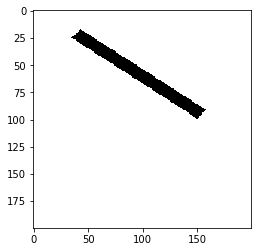

In [6]:
RGB=np.zeros((200, 200, 3), dtype = np.uint8)
RGB[:,:] = 255

data1 = linePZ([35, 25], [150, 99], width, RGB)
plotted(data1, 'datax1.png')

-1.0


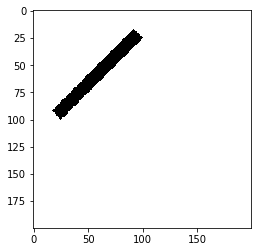

In [7]:
RGB=np.zeros((200, 200, 3), dtype = np.uint8)
RGB[:,:] = 255

data2 = linePZ([25, 100], [100, 25], width, RGB)
plotted(data2, 'datax2.png')

0.0


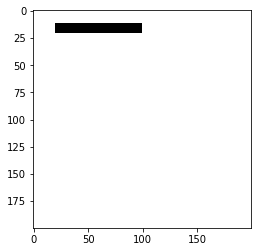

In [8]:
RGB=np.zeros((200, 200, 3), dtype = np.uint8)
RGB[:,:] = 255

data3 = linePZ([20, 20], [99, 20], width, RGB)
plotted(data3, 'datax3.png')

1


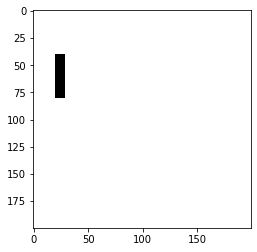

In [9]:
RGB=np.zeros((200, 200, 3), dtype = np.uint8)
RGB[:,:] = 255

data4 = linePZ([20, 40], [20, 80], width, RGB)
plotted(data4, 'datax4.png')

1.0


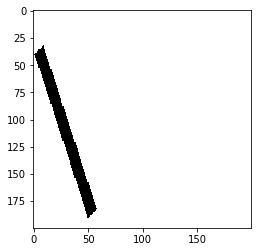

In [10]:
RGB=np.zeros((200, 200, 3), dtype = np.uint8)
RGB[:,:] = 255

data5 = linePZ([1, 40], [50, 190], width, RGB)
plotted(data5, 'datax5.png')

1.0


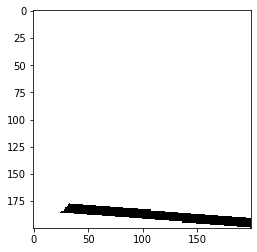

In [11]:
RGB=np.zeros((200, 200, 3), dtype = np.uint8)
RGB[:,:] = 255

data6 = linePZ([25, 185], [199, 199], width, RGB)
plotted(data6, 'datax6.png')

In [12]:
# Antialiasing

In [13]:
def _fpart(x):
    return x - int(x)

 
def _rfpart(x):
    return 1.0 - _fpart(x)

 
def _round(x):
    return int(np.floor(x+0.5))


def putpixel(data, x, y, color, alpha=1.0):
    x = int(x)
    y = int(y)
    bg = data[y][x]
    
    if(alpha>1.0):
        alpha=1.

    color2 = [0.0, 0.0, 0.0]
    color2[0] = alpha * color[0] + (1.0 - alpha) * bg[0]
    color2[1] = alpha * color[1] + (1.0 - alpha) * bg[1]
    color2[2] = alpha * color[2] + (1.0 - alpha) * bg[2]
    data[x, y] = color2
    
    return data


def lineXW(x1, y1, x2, y2, RGB, line=[0, 0, 0]):
    dx, dy = x2-x1, y2-y1
    steep = abs(dx) < abs(dy)
    
    if steep:
        x1, y1, x2, y2 = y1, x1, y2, x2
    if x2 < x1:
        x1, x2, y1, y2 = x2, x1, y2, y1
    
    dx, dy = x2-x1, y2-y1
    gradient = dy/dx
    intery = y1 + _rfpart(x1) * gradient
    
    xend = _round(x1)
    yend = y1 + gradient * (xend - x1)
    
    xgap = _rfpart(x1 + 0.5)
    xpxl1 = xend 
    ypxl1 = int(np.floor(yend))
    
    if steep:
        RGB = putpixel(RGB, xpxl1, ypxl1, line, _rfpart(yend) * xgap)
        RGB = putpixel(RGB, xpxl1, ypxl1+1, line, _fpart(yend) * xgap)
        
        intery = yend + gradient
        xend = _round(x2)
        yend = y2 + gradient * (xend - x2)
        xgap = _fpart(x2 + 0.5)
        xpxl2 = xend 
        ypxl2 = int(np.floor(yend))
        
        RGB = putpixel(RGB, xpxl2, ypxl2, line, _rfpart(yend) * xgap)
        RGB = putpixel(RGB, xpxl2, ypxl2+1, line, _fpart(yend) * xgap)
        
        for x in range(xpxl1 + 1, xpxl2):
            RGB = putpixel(RGB, x, int(np.floor(intery)), line, _rfpart(intery) * xgap)
            RGB = putpixel(RGB, x, int(np.floor(intery))+1, line, _fpart(intery) * xgap)
            intery = intery + gradient
        
    else:
        RGB = putpixel(RGB, ypxl1, xpxl1, line, _rfpart(yend) * xgap)
        RGB = putpixel(RGB, ypxl1+1, xpxl1, line, _fpart(yend) * xgap)
        
        intery = yend + gradient
        xend = _round(x2)
        yend = y2 + gradient * (xend - x2)
        xgap = _fpart(x2 + 0.5)
        xpxl2 = xend 
        ypxl2 = int(np.floor(yend))
        
        RGB = putpixel(RGB, ypxl2, xpxl2, line, _rfpart(yend) * xgap)
        RGB = putpixel(RGB, ypxl2+1, xpxl2, line, _fpart(yend) * xgap)
        
        for x in range (xpxl1 + 1, xpxl2):
            RGB = putpixel(RGB, int(np.floor(intery)), x, line, _rfpart(intery) * xgap)
            RGB = putpixel(RGB, int(np.floor(intery))+1, x, line, _fpart(intery) * xgap)

            intery = intery + gradient
    
    return RGB

In [14]:
def linePZA(P1, P2, d, RGB):
    assert isinstance(d, int)
    assert d > 0
    assert isinstance(P1, (list, tuple))
    assert isinstance(P2, (list, tuple))
    assert P1[0] > 0 and P1[0] < RGB.shape[1]
    assert P1[1] > 0 and P1[1] < RGB.shape[0]
    assert P2[0] > 0 and P2[0] < RGB.shape[1]
    assert P2[1] > 0 and P2[1] < RGB.shape[0]
    
    if d == 1:
        lineXW(P1[0], P1[1], P2[0], P2[1], RGB)
    
    elif d == 2:
        d = d-1
        a = linear_value_of_a(P1, P2)
        check_a_and_draw2(a, d, P1, P2, RGB)

    else:
        a = linear_value_of_a(P1, P2)
        d_copy = d-1
        check_a_and_draw2(a, d_copy, P1, P2, RGB)
        
    return RGB

In [15]:
def xw(A, B, C, D, RGB):
    A = check(A, RGB)
    B = check(B, RGB)
    C = check(C, RGB)
    D = check(D, RGB)

    RGB = lineXW(A[0], A[1], B[0], B[1], RGB)
    RGB = lineXW(B[0], B[1], C[0], C[1], RGB)
    RGB = lineXW(C[0], C[1], D[0], D[1], RGB)
    RGB = lineXW(D[0], D[1], A[0], A[1], RGB)
    
    return RGB


def check(pair, RGB):
    if pair[0] > RGB.shape[1]-3:
        pair[0] = RGB.shape[1] - 2
    
    if pair[1] > RGB.shape[0]-3:
        pair[1] = RGB.shape[0] - 2

    return pair


def check_a_and_draw2(a, d, P1, P2, RGB):
    # recycling z LinePZ
    m = np.shape(RGB)[1]
    n = np.shape(RGB)[0]
    
    if a == 0:
        # pozioma
        A = P1[0], P1[1]
        B = P2[0], P2[1]
        C = P2[0], P2[1]-d
        D = P1[0], P1[1]-d

        # przekatna na wszelki wypadek
        lineS(A[0], A[1], C[0], C[1], RGB)
        # wypelnienie
        RGB = fill_it(A, B, C, D, RGB, m, n)

    elif a == 1:
        if P1[0] == P2[0]:
            # pionowa
            A = P1[0], P1[1]
            B = P1[0]+d, P1[1]
            C = P2[0]+d, P2[1]
            D = P2[0], P2[1]

            # przekatna
            lineS(A[0], A[1], C[0], C[1], RGB)
            # wypelnienie
            RGB = fill_it(A, B, C, D, RGB, m, n)

        else:
            # rosnaca
            A = [P1[0], P1[1]]
            B = [P2[0], P2[1]]
            C = [P2[0]+d, P2[1]-d]
            D = [P1[0]+d, P1[1]-d]

            # krawedzie
            RGB = xw(A, B, C, D, RGB)
            # wypelnienie
            RGB = fill_it(A, B, C, D, RGB, m, n)

    else:  # a = -1
        # malejaca
        A = [P1[0], P1[1]]
        B = [P2[0], P2[1]]
        C = [P2[0]-d, P2[1]-d]
        D = [P1[0]-d, P1[1]-d]

        # krawedzie
        RGB = xw(A, B, C, D, RGB)
        # wypelnienie
        RGB = fill_it(A, B, C, D, RGB, m, n)
        
    return RGB

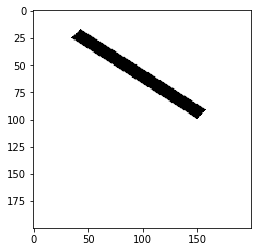

In [16]:
RGB=np.zeros((200, 200, 3), dtype = np.uint8)
RGB[:,:] = 255

data1a = linePZA([35, 25], [150, 99], width, RGB)
plotted(data1a, 'datax1a.png')

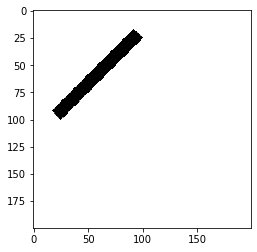

In [17]:
RGB=np.zeros((200, 200, 3), dtype = np.uint8)
RGB[:,:] = 255

data2a = linePZA([25, 100], [100, 25], width, RGB)
plotted(data2a, 'datax2a.png')

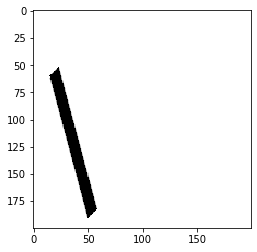

In [18]:
RGB=np.zeros((200, 200, 3), dtype = np.uint8)
RGB[:,:] = 255

data5a = linePZA([15, 60], [50, 190], width, RGB)
plotted(data5a, 'datax5a.png')

In [19]:
# porownanie dla d = [1, 10]

wyniki = []

for d in range(1, 11):
    wyniki_proba = []
    for proba in range(20):
        RGB=np.zeros((200, 200, 3), dtype = np.uint8)
        RGB[:,:] = 255

        P1 = random.randint(10, 190), random.randint(10, 190)
        P2 = random.randint(10, 190), random.randint(10, 190)
    
        try:
            start = time.time()
            linePZA(P1, P2, d, RGB)
            end = time.time()
            wynik = end - start
            
            #print('d:', d, 'proba:', proba+1, 'wynik:', wynik)
            wyniki_proba.append(wynik)
        except ZeroDivisionError:
            continue
    
    wyniki.append(np.mean(wyniki_proba))

for d in range(10):
    print('d =', d+1, 'wynik:', wyniki[d])

d = 1 wynik: 0.001885056495666504
d = 2 wynik: 0.73022962808609
d = 3 wynik: 0.7295762658119201
d = 4 wynik: 0.7263092279434205
d = 5 wynik: 0.7242486834526062
d = 6 wynik: 0.7246821761131287
d = 7 wynik: 0.7302393674850464
d = 8 wynik: 0.7332929372787476
d = 9 wynik: 0.730848228931427
d = 10 wynik: 0.7294721484184266
